Dataset Shape: (1000, 6)


,HeartRate,SpO2,SystolicBP,DiastolicBP,Temperature,target
0,76.554538,97.008608,102.269675,88.777378,36.640564,0
1,76.178073,97.330927,103.923390,86.318533,36.250657,0
2,79.577011,98.583928,115.353827,78.064347,36.700964,0
3,66.184799,97.469003,145.895636,76.547295,36.242630,0
4,77.852993,98.486502,117.371092,79.679059,36.264087,0


C:\Games\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3175 - val_loss: 0.2442
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2124 - val_loss: 0.1598
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1552 - val_loss: 0.1294
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1376 - val_loss: 0.1159
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1248 - val_loss: 0.1060
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1163 - val_loss: 0.0960
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1080 - val_loss: 0.0863
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0977 - val_loss: 0.0769
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0915 - val_loss: 0.0688
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0807 - val_loss: 0.0604
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0752 - val_loss: 0.0534
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - val_l

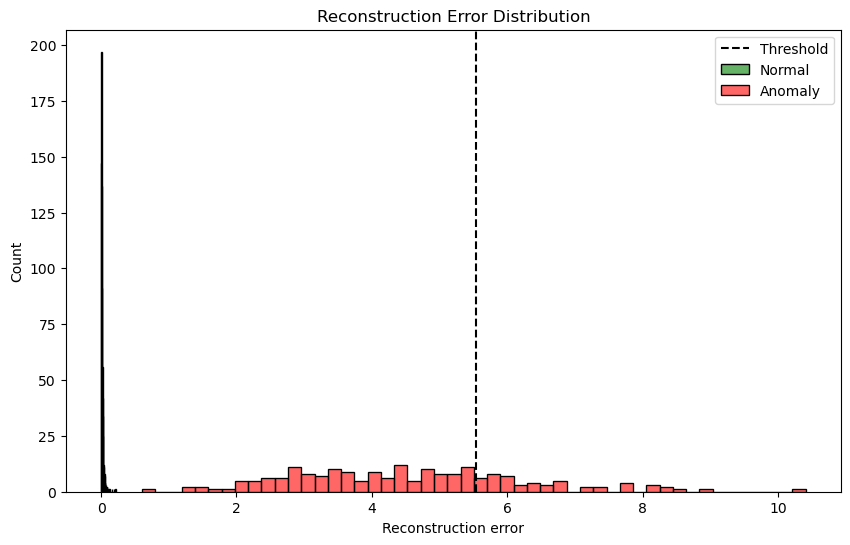

In [1]:
# IoT-Based Smart Health Monitoring with AI-powered Anomaly Detection
# Offline Synthetic Dataset Example

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Create Synthetic IoT Health Dataset
# Features: HeartRate, SpO2, SystolicBP, DiastolicBP, Temperature
np.random.seed(42)

# Normal patient data
n_normal = 800
normal_data = pd.DataFrame({
    "HeartRate": np.random.normal(75, 5, n_normal),   # normal 60-100
    "SpO2": np.random.normal(98, 1, n_normal),        # normal >95
    "SystolicBP": np.random.normal(120, 10, n_normal),
    "DiastolicBP": np.random.normal(80, 5, n_normal),
    "Temperature": np.random.normal(36.8, 0.3, n_normal),
    "target": 0
})

# Anomalous patient data
n_anomaly = 200
anomaly_data = pd.DataFrame({
    "HeartRate": np.random.normal(120, 15, n_anomaly),   # high HR
    "SpO2": np.random.normal(88, 5, n_anomaly),          # low SpO2
    "SystolicBP": np.random.normal(160, 20, n_anomaly),  # high BP
    "DiastolicBP": np.random.normal(100, 10, n_anomaly),
    "Temperature": np.random.normal(39, 0.8, n_anomaly), # fever
    "target": 1
})

# Combine dataset
data = pd.concat([normal_data, anomaly_data]).sample(frac=1).reset_index(drop=True)

print("Dataset Shape:", data.shape)
display(data.head())

# 2. Preprocessing
X = data.drop("target", axis=1)
y = data["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into normal and anomaly
X_normal = X_scaled[y == 0]
X_anomaly = X_scaled[y == 1]

# 3. Autoencoder Model
model = Sequential([
    Dense(16, activation="relu", input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(8, activation="relu"),
    Dense(16, activation="relu"),
    Dense(X.shape[1], activation="linear")
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# 4. Train only on normal data
history = model.fit(
    X_normal, X_normal,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 5. Reconstruction Error
reconstructions = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Set threshold at 95th percentile
threshold = np.percentile(mse, 95)
print("Threshold:", threshold)

# Predictions
y_pred = (mse > threshold).astype(int)

# 6. Evaluation
print("\nClassification Report:")
print(classification_report(y, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

# 7. Visualization
plt.figure(figsize=(10,6))
sns.histplot(mse[y==0], bins=50, color="green", label="Normal", alpha=0.6)
sns.histplot(mse[y==1], bins=50, color="red", label="Anomaly", alpha=0.6)
plt.axvline(threshold, color="black", linestyle="--", label="Threshold")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction error")
plt.ylabel("Count")
plt.legend()
plt.show()
